# Projet en autonomie
#### RANIA BEN DHIA <rania.ben.dhia@etu.univ-poitiers.fr>	
#### MARWAN AL OMARI <marwan.al.omari@etu.univ-poitiers.fr>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
conda install -c ales-erjavec orange3

Note: you may need to restart the kernel to use updated packages.


C:\Users\ASUS\anaconda3\lib\site-packages\conda\core\link.py:1139: UserWarning: Package ales-erjavec::keyrings.alt-1.1.1-py_0 uses a pre-link script. Pre-link scripts are potentially dangerous.
This is because pre-link scripts have the ability to change the package contents in the
package cache, and therefore modify the underlying files for already-created conda
environments.  Future versions of conda may deprecate and ignore pre-link scripts.




Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ASUS\anaconda3

  added / updated specs:
    - orange3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anyqt-0.0.10               |   py38haa95532_0          48 KB
    baycomp-1.0.2              |             py_1          20 KB
    cachecontrol-0.12.6        |             py_0         206 KB
    commonmark-0.9.1           |             py_0          49 KB
    conda-4.9.2                |   py38haa95532_0         2.9 MB
    dictdiffer-0.8.0           |             py_0          18 KB
    h11-0.9.0                  |             py_0          46 KB
    h2-4.0.0                

In [12]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ASUS\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    openssl-1.1.1g             |       he774522_0         5.7 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         8.9 MB

The following NEW packages will 

In [13]:
# Bibliothèques

import Orange
import numpy as np
import matplotlib.pyplot as plt
from Orange.preprocess import Normalize
from Orange.regression.linear import LinearRegressionLearner
import sklearn
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_curve, confusion_matrix
from sklearn import model_selection
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

## Estimation du taux d’alcool dans les données Wine

#### Estimer le taux d’alcool des échantillons du jeu de données Wine en fonction des autres attributs.

In [50]:
# Données
data = Orange.data.Table("wine.tab")

data.domain.attributes
data.domain.class_var

attr=print("Attributs :", ", ".join(x.name for x in data.domain.attributes))
print ("\n")
classe=print("Classes :", data.domain.class_var.name)
print ("\n")
instance=print("Instances des données : ", len(data))

Attributs : Alcohol, Malic Acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline


Classes : Wine


Instances des données :  178


In [47]:
# Normaliser la version
normalizer = Normalize(zero_based=True,transform_class=True,norm_type=Normalize.NormalizeBySpan)
new_dom = Orange.data.Domain(list(data.domain.attributes[1:13]),data.domain.attributes[0])
new_data = Orange.data.Table.from_table(new_dom, data)
new_data_wine = normalizer(new_data)

In [56]:
new_data

[[1.71, 2.43, 15.6, 127, 2.80, ... | 14.23],
 [1.78, 2.14, 11.2, 100, 2.65, ... | 13.20],
 [2.36, 2.67, 18.6, 101, 2.80, ... | 13.16],
 [1.95, 2.50, 16.8, 113, 3.85, ... | 14.37],
 [2.59, 2.87, 21.0, 118, 2.80, ... | 13.24],
 ...
]

In [57]:
new_data_wine

[[0.1917, 0.572193, 0.257732, 0.619565, 0.627586, ... | 0.842105],
 [0.205534, 0.417112, 0.0309278, 0.326087, 0.575862, ... | 0.571053],
 [0.320158, 0.700535, 0.412371, 0.336957, 0.627586, ... | 0.560526],
 [0.23913, 0.609626, 0.319588, 0.467391, 0.989655, ... | 0.878947],
 [0.365613, 0.807487, 0.536082, 0.521739, 0.627586, ... | 0.581579],
 ...
]

In [16]:
# Régression linéaire

learner = LinearRegressionLearner()
model = learner(new_data_wine)

# Evaluation en utilisant Cross-Validation
evalu = Orange.evaluation.CrossValidation(new_data_wine, [model], k=10)

# Séparer les données
y_actual = new_data_wine.Y
y_predict = np.array([model(new_data_wine)])

# Résultat d'apprentissage
res = Orange.evaluation.testing.Results(new_data_wine,actual=y_actual,predicted=y_predict)
y_predict = y_predict.transpose() 

In [58]:
y_actual

array([0.84210526, 0.57105263, 0.56052632, 0.87894737, 0.58157895,
       0.83421053, 0.88421053, 0.79736842, 1.        , 0.74473684,
       0.80789474, 0.81315789, 0.71578947, 0.97894737, 0.88157895,
       0.68421053, 0.86052632, 0.73684211, 0.83157895, 0.68684211,
       0.79736842, 0.5       , 0.70526316, 0.47894737, 0.65      ,
       0.53157895, 0.62105263, 0.59736842, 0.74736842, 0.78684211,
       0.71052632, 0.67105263, 0.69736842, 0.71842105, 0.65263158,
       0.64473684, 0.59210526, 0.53157895, 0.53684211, 0.83947368,
       0.66578947, 0.62631579, 0.75      , 0.58157895, 0.53157895,
       0.83684211, 0.88157895, 0.75526316, 0.80789474, 0.76578947,
       0.53157895, 0.73684211, 0.73421053, 0.72105263, 0.71315789,
       0.66578947, 0.83947368, 0.59473684, 0.70789474, 0.35263158,
       0.34210526, 0.42368421, 0.69473684, 0.35263158, 0.3       ,
       0.35263158, 0.54736842, 0.35263158, 0.60789474, 0.31052632,
       0.33157895, 0.74473684, 0.64736842, 0.51578947, 0.24473

In [59]:
y_predict

array([[0.69384554],
       [0.68882211],
       [0.67516743],
       [0.88823003],
       [0.51179714],
       [0.82289935],
       [0.74385054],
       [0.75468362],
       [0.64234955],
       [0.74025548],
       [0.78710862],
       [0.68106175],
       [0.73461803],
       [0.68542431],
       [0.89301419],
       [0.83012439],
       [0.70765334],
       [0.67788199],
       [0.96653554],
       [0.67028998],
       [0.61267863],
       [0.60627143],
       [0.62853568],
       [0.60359715],
       [0.53111762],
       [0.46548547],
       [0.69087788],
       [0.63691341],
       [0.59519949],
       [0.62822535],
       [0.64550879],
       [0.80601086],
       [0.54775306],
       [0.69381381],
       [0.59845844],
       [0.58364251],
       [0.59819541],
       [0.5954357 ],
       [0.56667083],
       [0.68532379],
       [0.60443355],
       [0.63914789],
       [0.72352899],
       [0.5590259 ],
       [0.57592667],
       [0.73461218],
       [0.70845593],
       [0.658

In [46]:
# Le score de prédiction sous la forme d’un calcul d’erreur quadratique moyenne.

# Mean Absolute Error
MAE = Orange.evaluation.MAE(res)
# Mean Squared Error
MSE = Orange.evaluation.MSE(res)
# Root Mean Squared Error
RMSE = Orange.evaluation.RMSE(res)

print ("Mean Absolute Error: %.3f"% MAE)
print ("Mean Squared Error: %.3f"% MSE)
print ("Root Mean Squared Error: %.3f"% RMSE)

Mean Absolute Error: 0.107
Mean Squared Error: 0.018
Root Mean Squared Error: 0.136


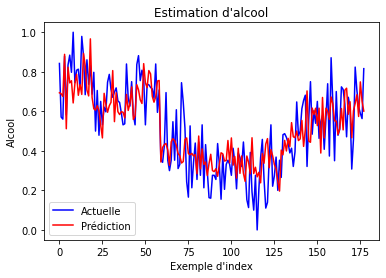

In [51]:
# Un tracé des taux d’alcool de chaque échantillon pour les données initiales
# l'autre pour les données prédites

plt.plot(y_actual,'b', label='Actuelle')
plt.plot(y_predict,'r', label='Prédiction')
plt.legend()
plt.title("Estimation d'alcool")
plt.ylabel('Alcool')
plt.xlabel("Exemple d'index")
plt.show()

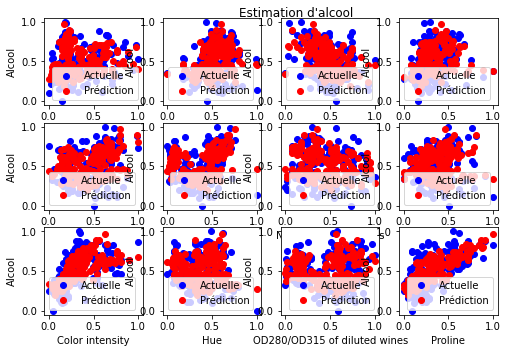

In [44]:
# Les tracés 2D des nuages de points données réelles
# et prédictions représentant le taux d’alcool

plt.figure(figsize=(7,5), facecolor='white')
plt.suptitle("Estimation d'alcool", fontsize=12)  
for i in range (0,12):
    plt_num=i+1
    plt.subplot(3,4,plt_num)
    plt.plot(new_data_wine.X[:,i], y_actual,'bo', new_data_wine.X[:,i], y_predict, 'ro')
    plt.legend(('Actuelle', 'Prédiction'))
    plt.xlabel(data.domain.attributes[i+1])
    plt.ylabel('Alcool')  
    
plt.subplots_adjust(left=0, wspace=0.2, top=0.95)
plt.show()

## Détection de risque dans les données Heart-disease

In [26]:
"""usage: X, y = orange_loadtab ( path )"""    

def orange_loadtab ( path ):
    data = pd.read_table ( path )
    dtypes = data.values [0 ,:]
    data = data.drop ( index =0 )
    data = data.dropna ()
    
    for attribute , dtype in zip( data . columns , dtypes ):
        if dtype == 'continuous':
            data = data.astype ({ attribute : np . float })
        else :
            encoder = sklearn.preprocessing.LabelEncoder ()
            data [ attribute ] = encoder.fit_transform ( data [ attribute ])
    return data.values [:,:-1], data.values [:,-1]

In [27]:
# Chargement des données
X, y= orange_loadtab('heart-disease.tab')

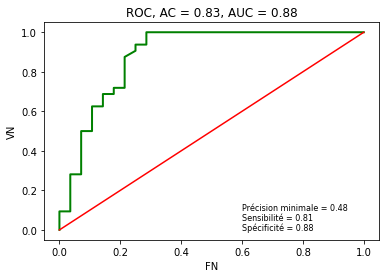

In [54]:
# La courbe ROC : contrairement aux habitudes, elle va représenter le taux de vrais négatifs (VN) en fonction du taux de faux négatifs (FN). 
# Par un classifieur SVM avec noyau linéaire et la méthode des k-folds (k = 5) pour l’apprentissage.

# Chargement du modèle

kf = model_selection.StratifiedKFold(n_splits=5)
clf = SVC( kernel='linear', probability=True) 

# Boocle VN / FN 
for i, (train, test) in enumerate(kf.split(X,y)):
    if i==0:
        probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
        fpr, tpr, _ = roc_curve(y[test], probas_[:, 1]) #FP et VP
        precision, recall, _ = precision_recall_curve(y[test], probas_[:, 1])
        #Matrice de confusion
        conf_mat=confusion_matrix(y[test], probas_[:, 1].round()) 
        fnr = 1-tpr #FN
        tnr = 1-fpr #VN
        roc_ac = accuracy_score(y[test], probas_[:, 1].round())
        break

#Affichage de la courbe ROC
roc_auc = auc(fpr, tpr)
Sensibilité = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0])
Spécificité = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])

plt.plot(fnr, tnr, 'g', lw=2) 
plt.plot([0, 1], [0, 1], 'r')
plt.xlabel('FN')
plt.ylabel('VN')
plt.title('ROC, AC = %0.2f, AUC = %0.2f' %(roc_ac,roc_auc))
plt.text(0.6, 0.1, 'Précision minimale = %0.2f'% min(precision),fontsize=8)
plt.text(0.6, 0.05, 'Sensibilité = %0.2f'% Sensibilité,fontsize=8)
plt.text(0.6, 0.0, 'Spécificité = %0.2f'% Spécificité,fontsize=8)    
plt.show()

Dataset Modifiée Counter({0.0: 170, 1.0: 100})


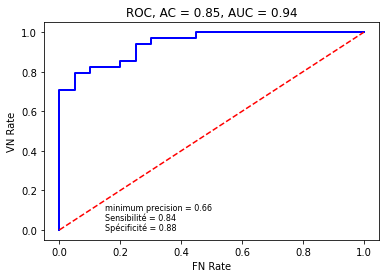

In [55]:
# Taux de faux négatifs amené au niveau le plus faible possible tout en conservant une précision supérieure à 65%. 
# Pour une meilleure classification 

aléatoire=4;

#targets
Index_Pos=100;
Index_Neg=170;

ra = RandomOverSampler(random_state=aléatoire,sampling_strategy=dict([ (0, Index_Neg),(1, 137)]));
ma = RandomUnderSampler(random_state=aléatoire,sampling_strategy=dict([ (0, Index_Neg),(1, Index_Pos)]) )
X_resampled, y_resampled = ra.fit_resample(X, y);
X_resampled, y_resampled = ma.fit_resample(X_resampled, y_resampled);
print('Dataset Modifiée %s' % Counter(y_resampled))


kf = model_selection.StratifiedKFold(n_splits=5);
classifier = SVC( kernel='linear', probability=True);

for i, (train, test) in enumerate(kf.split(X_resampled,y_resampled)):
    if i==0:
        probas_ = classifier.fit(X_resampled[train], y_resampled[train]).predict_proba(X_resampled[test]);
        fpr, tpr, thresholds = roc_curve(y_resampled[test], probas_[:, 1]);
        precision, recall, _ = precision_recall_curve(y_resampled[test], probas_[:, 1]);
        conf_mat=confusion_matrix(y_resampled[test], probas_[:, 1].round());
        fnr = 1-tpr;
        tnr = 1-fpr;
        roc_ac = accuracy_score(y_resampled[test], probas_[:, 1].round());
        break

roc_auc = auc(fpr, tpr);
Sensibilité = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0]);
Spécificité = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1]);

# Affichage de la courbe
plt.plot(fnr, tnr, 'b-', lw=2) 
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FN Rate')
plt.ylabel('VN Rate')
plt.title('ROC, AC = %0.2f, AUC = %0.2f' %(roc_ac,roc_auc))
plt.text(0.15, 0.1, 'minimum precision = %0.2f'% min(precision),fontsize=8)
plt.text(0.15, 0.05, 'Sensibilité = %0.2f'% Sensibilité,fontsize=8)
plt.text(0.15, 0.0, 'Spécificité = %0.2f'% Spécificité,fontsize=8)   
plt.show()